# 12232253_殷玉领

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Import integrate
from scipy import integrate
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from numpy import exp
 
#plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

#隐藏警告
import warnings
warnings.filterwarnings('ignore')

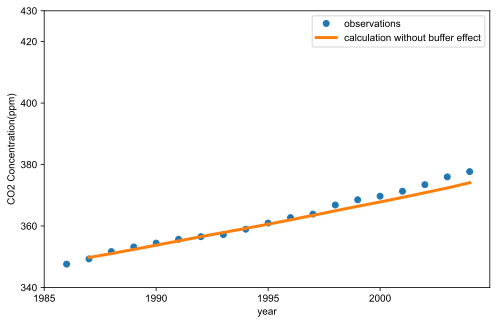

In [7]:
# Ploblem 1_1

# 读取全球大气中的CO2含量，单位ppm（1986-2004）
co2 = pd.read_csv("co2_annmean_mlo.csv",
                 skiprows = 55)
CO2=co2.loc[ (co2['year'] >1985)&(co2['year'] <2005)][['year','mean']]

#定义gama函数，返回年份对应的化石燃料燃烧产生的co2质量，并将单位转换为ppm

def gama(t):
    #读取全球化石燃料燃烧产生的co2质量（单位：百万吨）
    gama0 = pd.read_csv("global.1751_2008.csv")
    gama=float(gama0.loc[ (gama0['Year"'] ==int(t))]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return gama

#定义model函数，返回微分方程组
def model(f, t, k12, k21):
    N1,N2=f
    dfdt = [-k12*N1+k21*N2+gama(t),k12*N1-k21*N2]
    return dfdt

#初始参数
k12 = 105/740
k21 = 102/900

# 边界条件和时间步长
f0 = [740/2.13,900/2.13]
t = np.linspace(1985,2004,20)

# 求解 ODE
f = integrate.odeint(model, f0, t, args=(k12,k21))
ans1 = f[2:,0]

#设置画板
plt.figure(figsize=(8,5),dpi=200)

#绘制
plt.plot(CO2['year'], CO2['mean'],'o',label='observations', markersize=6)
plt.plot(t[2:], ans1,label='calculation without buffer effect', linewidth=3)
plt.xlabel('year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend(loc='best')
plt.show()

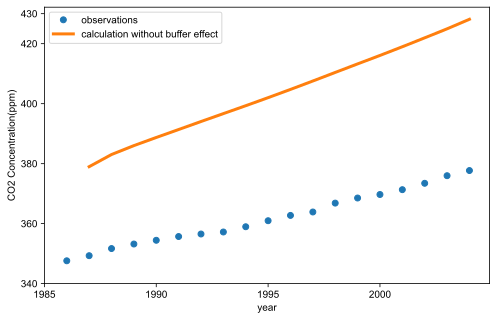

In [8]:
# Ploblem 1_2

# 读取全球大气中的CO2含量，单位ppm（1986-2004）
co2 = pd.read_csv("co2_annmean_mlo.csv",
                 skiprows = 55)
CO2=co2.loc[ (co2['year'] >1985)&(co2['year'] <2005)][['year','mean']]

#定义gama函数，返回年份对应的化石燃料燃烧产生的co2质量，并将单位转换为ppm
def gama(t):
    #读取全球化石燃料燃烧产生的co2质量（单位：百万吨）
    gama0 = pd.read_csv("global.1751_2008.csv")
    gama=float(gama0.loc[ (gama0['Year"'] ==int(t))]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return gama

#定义函数，计算xi
def xi(N1):
    xi=3.69+1.86*(1e-2)*N1-1.8*(1e-6)*N1*N1
    return xi

#定义model函数，返回微分方程组
def model(f, t, k12, k21, N20):
    N1,N2=f
    dfdt = [-k12*N1+k21*(N20+xi(N1)*(N2-N20))+gama(t),k12*N1-k21*(N20+xi(N1)*(N2-N20))]
    return dfdt

#初始参数
k12 = 105/740
k21 = 102/900
N20 = 821/2.13

# 边界条件和时间步长
f0 = [740/2.13,900/2.13]
t = np.linspace(1985,2004,20)

# 求解 ODE
f = integrate.odeint(model, f0, t, args=(k12,k21,N20))
ans2 = f[2:,0]

#设置画板
plt.figure(figsize=(8,5),dpi=200)

#绘制
plt.plot(CO2['year'], CO2['mean'],'o',label='observations', markersize=6)
plt.plot(t[2:], ans2,label='calculation without buffer effect', linewidth=3)
plt.xlabel('year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend(loc='best')
plt.show()

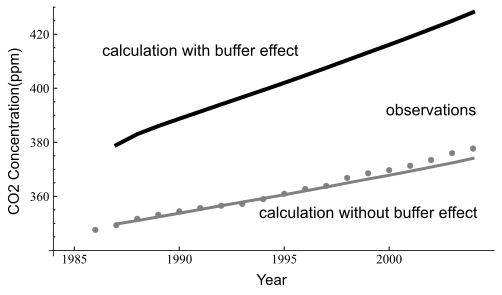

In [9]:
# Ploblem 1_3

#设置画布和axes
fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot(1, 1, 1)

#去掉上、右边框
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#确定xy轴交点，使得左下方坐标轴有突出部分
ax.spines['bottom'].set_position(('data',340))
ax.spines['left'].set_position(('data',1984))

# 绘图
ax.plot(t[2:], ans1[:],linewidth=3,color='grey',label='calculation without buffer effect')
ax.plot(t[2:], ans2[:],linewidth=4,color='k',label='calculation with buffer effect')
ax.scatter(CO2['year'], CO2['mean'],s=32,c='grey',marker='o',lw=0.5,label='observations')

# 设置x大刻度和小刻度
plt.xlim(1983.8,2005)
ax.tick_params(axis='x',which='major',direction='in',width=1,length=4, pad=4,labelsize=13)
ax.set_xticks(np.arange(1985, 2000 + 5, 5))
ax.set_xticks(np.arange(180, 180 + 2.5, 2.5), minor=True)
ax.set_xlabel('Year',labelpad=8,fontsize=15)

# 设置y大刻度和小刻度
plt.ylim(338,430)
ax.tick_params(axis='y',which='major',direction='in',width=1,length=4, pad=4,labelsize=13)
ax.tick_params(axis='y',which='minor',direction='in',width=1,length=2)
ax.set_yticks(np.arange(360, 420 + 20, 20))
ax.set_yticks(np.arange(340, 430 + 5, 5), minor=True)
ax.set_ylabel('CO2 Concentration(ppm)',labelpad=8,fontsize=15)

#刻度值字体设置
labels = ax.get_xticklabels()+ ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

#设置文本
ax.text(1999,352,
        "calculation without buffer effect",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)
ax.text(1991,412,
        "calculation with buffer effect",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)
ax.text(2002,390,
        "observations",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)



#显示图形
plt.show()